In [39]:
!pip install matplotlib pandas networkx scipy 

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.22.4 which is incompatible.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.7.1 which is incompatible.



     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/14.8 MB 1.3 MB/s eta 0:00:12
     ---------------------------------------- 0.2/14.8 MB 1.8 MB/s eta 0:00:08
      --------------------------------------- 0.3/14.8 MB 2.0 MB/s eta 0:00:08
      --------------------------------------- 0.4/14.8 MB 1.9 MB/s eta 0:00:08
     - -------------------------------------- 0.5/14.8 MB 2.0 MB/s eta 0:00:08
     - -------------------------------------- 0.5/14.8 MB 2.0 MB/s eta 0:00:08
     - -------------------------------------- 0.6/14.8 MB 2.0 MB/s eta 0:00:08
     - -------------------------------------- 0.7/14.8 MB 2.0 MB/s eta 0:00:08
     -- ------------------------------------- 0.8/14.8 MB 2.0 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/14.8 MB 2.0 MB/s eta 0:00:08
     -- ------------------------------------- 1.0/14.8 MB 2.0 MB/s eta 0:00:07
     -- ------------------------------------- 1.1/14.8 MB 

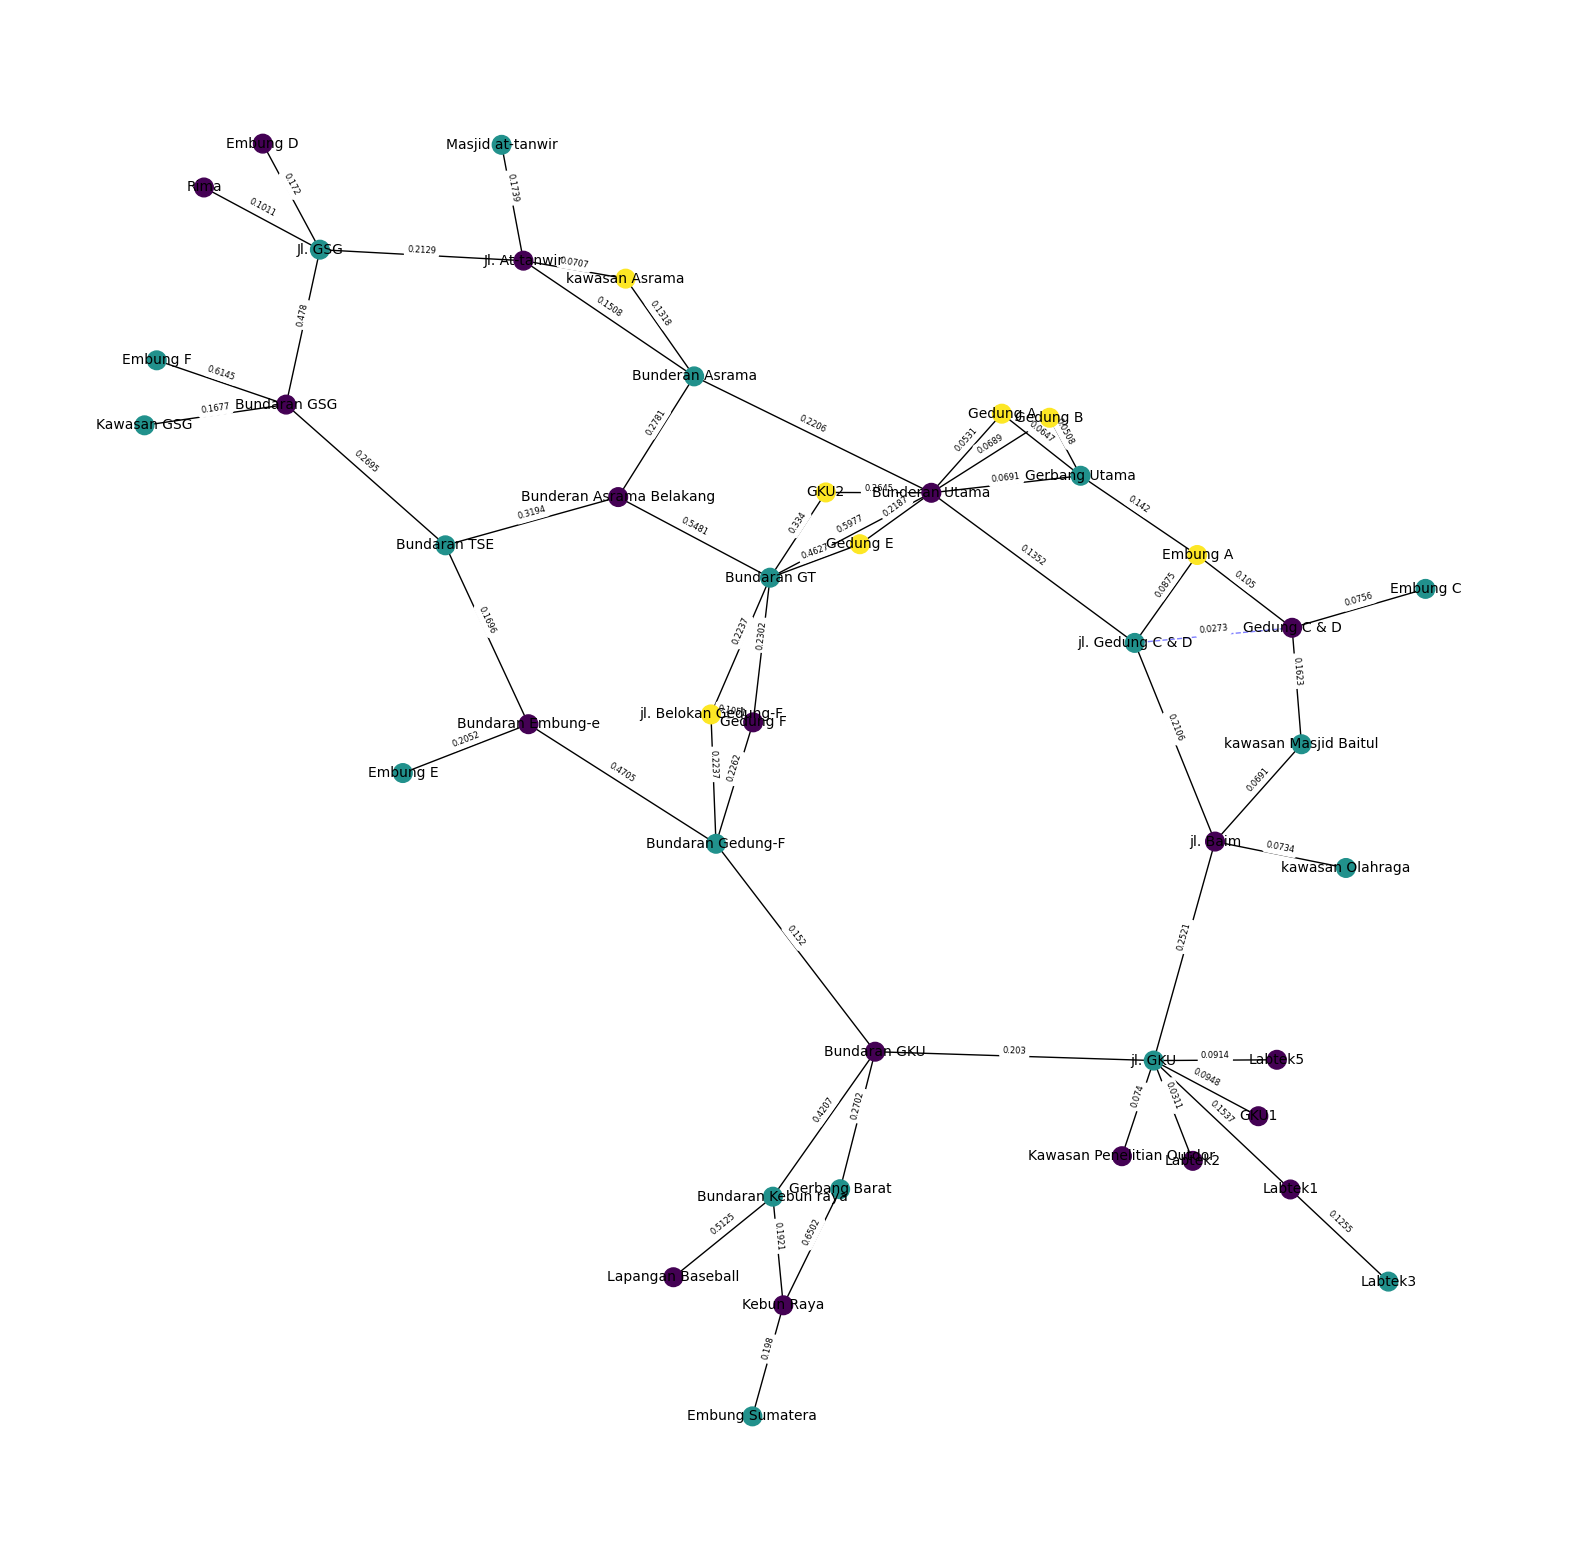

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import math
import pandas as pd


def calculate_distance_between_lat_lon(G, node1, node2):
    # get the lat lon of the nodes
    lat1 = G.nodes[node1]["lat"]
    lon1 = G.nodes[node1]["lon"]
    lat2 = G.nodes[node2]["lat"]
    lon2 = G.nodes[node2]["lon"]
    # calculate the distance
    distance = distance_lat_lon(lat1, lon1, lat2, lon2)
    return distance


def distance_lat_lon(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km with the haversine formula

    lat1 = float(lat1)
    lon1 = float(lon1)
    lat2 = float(lat2)
    lon2 = float(lon2)

    R = 6373.0
    # convert to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    # change in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    # haversine formula
    a = (
        math.sin(dlat / 2) ** 2
        + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    )
    # c is the central angle
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    # distance is the radius times the central angle
    distance = R * c
    # get .f2
    distance = float("{:.4f}".format(distance))

    return distance


# create graph object that contain vertex and value lat lon
G = nx.Graph()

# read the data from csv file

df = pd.read_excel("../data/datavertex.xlsx")
# get lat lon from data cordinate
df["lat"] = df["cordinate"].apply(lambda x: x.split(",")[0])
df["lon"] = df["cordinate"].apply(lambda x: x.split(",")[1])
# # add node to graph
for i in range(len(df)):
    G.add_node(df["node"][i], lat=df["lat"][i], lon=df["lon"][i])

# read the data from csv file
df = pd.read_excel("../data/edges.xlsx")
# add edge to graph
for i in range(len(df)):
    G.add_edge(
        df["vertek"][i],
        df["to"][i],
        weight=calculate_distance_between_lat_lon(G, df["vertek"][i], df["to"][i]),
    )


# visualize the graph
# make visualization bigger

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.03]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.03]

plt.figure(figsize=(20, 20))
# make visualization bigger, and change the layout algorithm to neato (for more info: https://graphviz.org/doc/info/attrs.html) and set the seed to 0 for reproducibility (for more info: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) and set the seed to 0 for reproducibility (for more info: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) 

pos = nx.spring_layout(G, seed=0,scale=3, threshold=0.001,iterations=3000, k=0.14, weight=1.)
# draw nodes
color_map = []
# with gredy coloring

gredy_coloring = nx.greedy_color(G, strategy="largest_first")
for node in G:
    color_map.append(gredy_coloring[node])

# draw nodes with color_map
nx.draw_networkx_nodes(G, pos, node_size=180, node_color=color_map)
# draw edges
# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif",font_color="black")
# draw edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed"
)

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels,verticalalignment="bottom",horizontalalignment="center",font_size=6,font_color="black")


# save the graph as png 
plt.axis("off")
plt.savefig("graph.png")
# show the graph
plt.show()





1. Gerbang Utama
2. Gedung B
3. Gedung A
4. Bunderan Utama
5. Gedung C & D
6. Bunderan Asrama
7. Bunderan Asrama Belakang
8. kawasan Asrama
9. Jl. At-tanwir
10. Jl. GSG
11. Embung D
12. Bundaran GSG
13. Kawasan GSG
14. Bundaran TSE
15. Bundaran Embung-e
16. Bundaran GT
17. Bundaran GKU
18. Gedung E
19. GKU2
20. Gedung F
21. Labtek5
22. Labtek2
23. GKU1
24. Labtek1
25. Labtek3
26. kawasan Masjid Baitul
27. kawasan Olahraga
28. Bundaran Kebun raya
29. Embung Sumatera
30. Lapangan Baseball
31. Kawasan Penelitian Outdor
32. Gerbang Barat
33. Rima
34. Kebun Raya
35. Bundaran Gedung-F
36. jl. GKU
37. jl. Baim
38. Masjid at-tanwir
39. Embung A
40. Embung E
41. Embung C
42. Embung F
43. jl. Belokan Gedung-F
44. jl. Gedung C & D
['Gedung F', 'Bundaran Gedung-F', 'Bundaran GKU', 'Gerbang Barat']
Jarak terpendek dari Gedung F ke Gerbang Barat adalah 0.6484 km


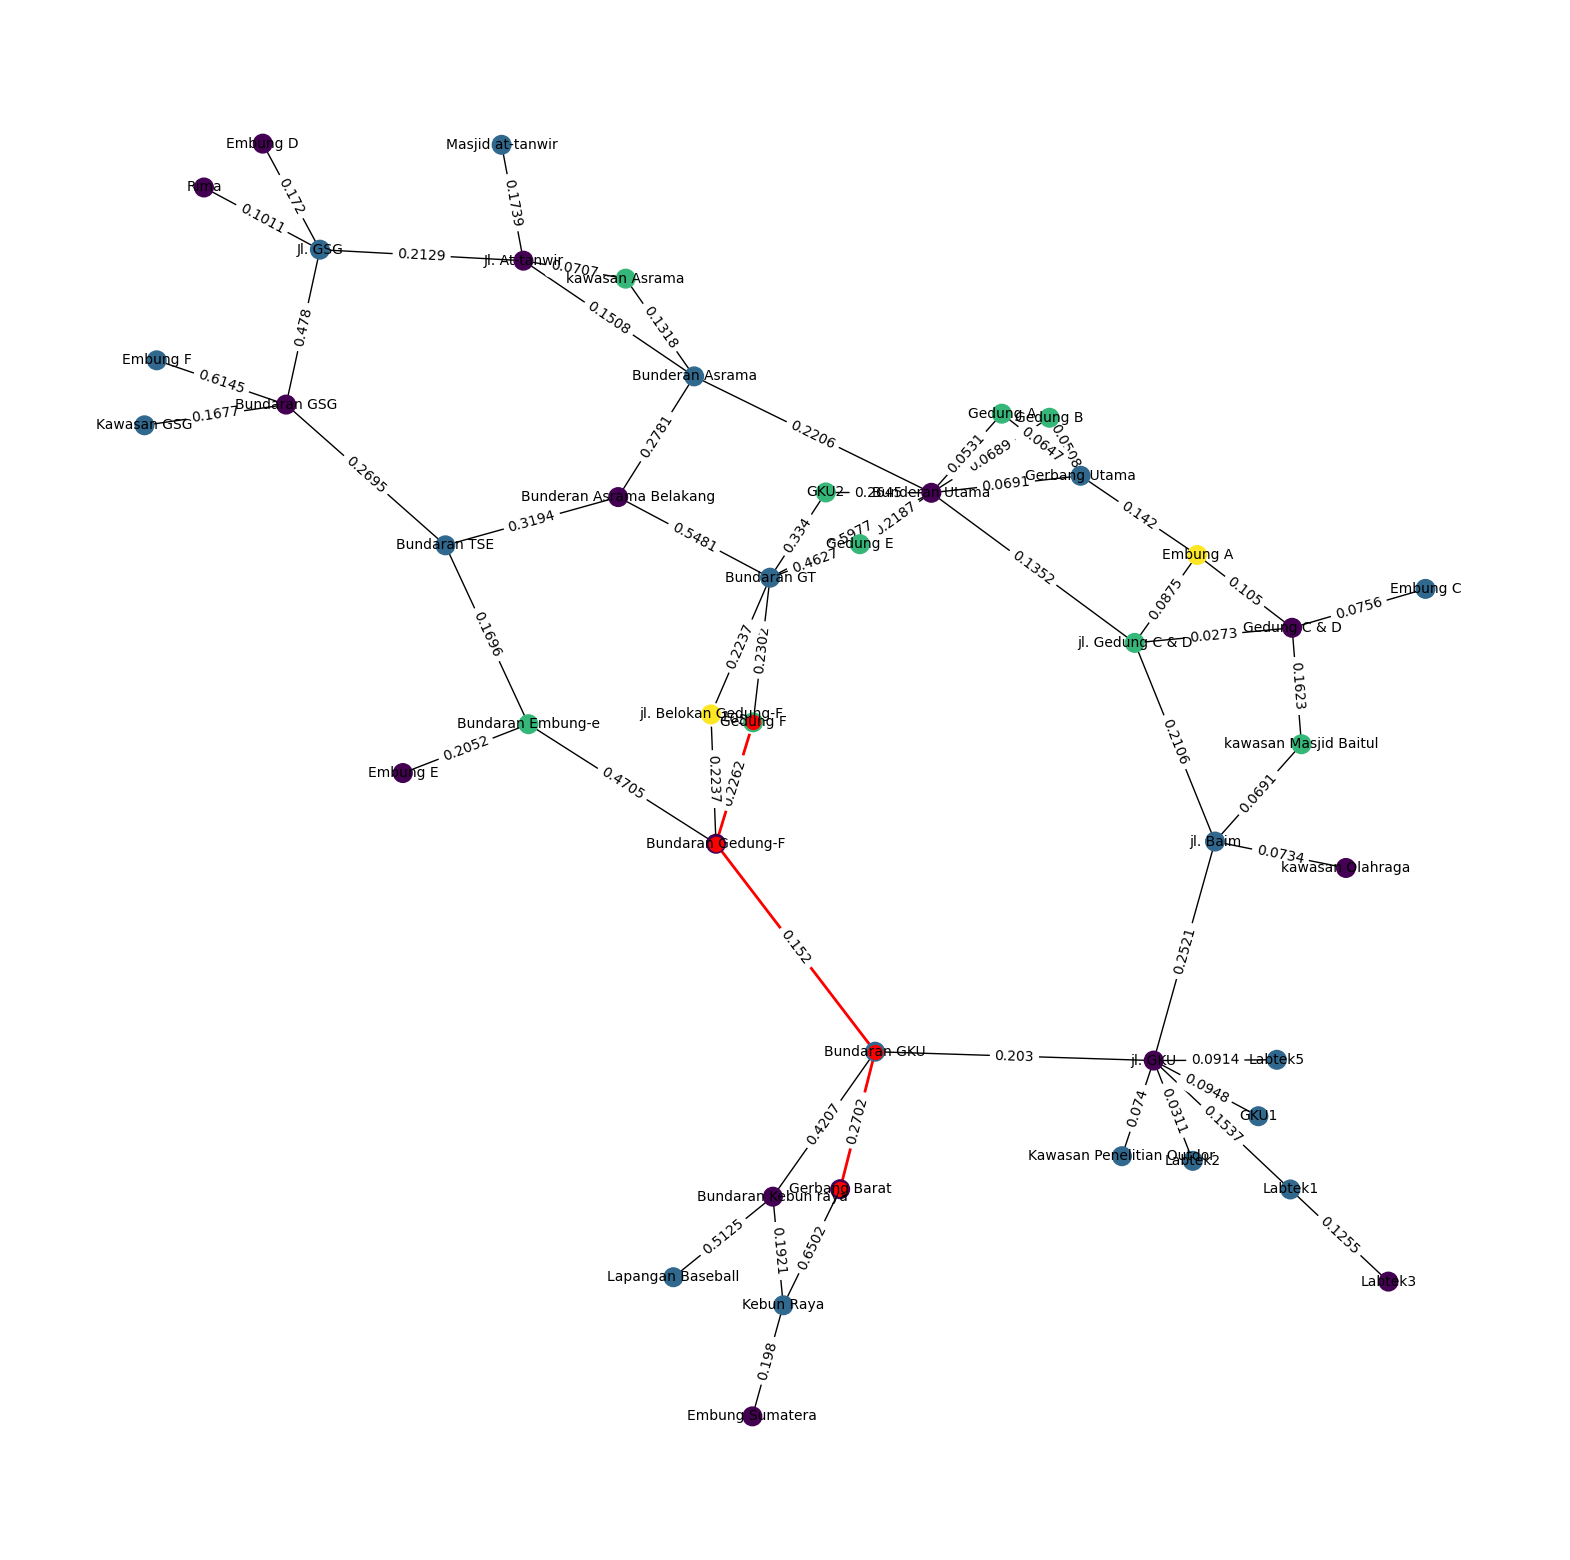

In [18]:


# get the list of nodes
nodes = list(G.nodes)
# create list of tuples with node name and node name as label for and input user 1 to n
for i, node in enumerate(nodes):
    print(f"{i+1}. {node}")
# get input from user
source_node = nodes[int(input("Masukkan nomor node asal:  (1-n)"))-1]
target_node = nodes[int(input("Masukkan nomor node tujuan: (1-n)"))-1]






plt.figure(figsize=(20, 20))
# make visualization bigger, and change the layout algorithm to neato (for more info: https://graphviz.org/doc/info/attrs.html) and set the seed to 0 for reproducibility (for more info: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) and set the seed to 0 for reproducibility (for more info: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) 

pos = nx.spring_layout(G, seed=0,scale=3, threshold=0.001,iterations=3000, k=0.14, weight=1.)
# draw nodes
color_map = []
# with gredy coloring

gredy_coloring = nx.greedy_color(G, strategy="largest_first")
for node in G:
    color_map.append(gredy_coloring[node])

# draw nodes with color_map
nx.draw_networkx_nodes(G, pos, node_size=180, node_color=color_map)

# labels weight of edges (distance) 
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)



# find the shortest path from Gerbang Utama to Gerbang Barat
path = nx.shortest_path(G, source=source_node, target=target_node)
print(path)
# get weight of the path and sum it
sum_weight = 0
for i in range(len(path) - 1):
    sum_weight += G[path[i]][path[i + 1]]["weight"]
print(f"Jarak terpendek dari {source_node} ke {target_node} adalah {sum_weight} km")


# draw the shortest path from Gerbang Utama to Gerbang Barat with red color
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="r", node_size=100)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="r", width=2)

# draw labels
# show the graph
plt.axis("off")
plt.show()        